3355 matches


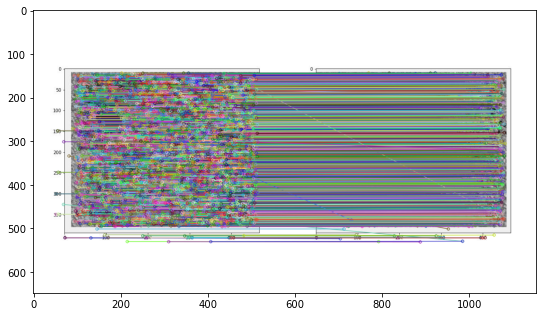

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt  



#读入图片
imgA = cv2.imread('/Users/huangjiawei/opencv-tutorial/black/heizi1.jpg')
imgB = cv2.imread('/Users/huangjiawei/opencv-tutorial/black/heizi2.jpg')


#构造sift，求解出特征点和sift特征向量
sift = cv2.SIFT_create()
grayA = cv2.cvtColor(imgA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imgB, cv2.COLOR_BGR2GRAY)
kpsA, dpA = sift.detectAndCompute(grayA,None)
kpsB, dpB = sift.detectAndCompute(grayB,None)

#构造BFMatcher()蛮力匹配，匹配sift特征向量距离最近对应组分
bf = cv2.BFMatcher()
#获得匹配结果
matches = bf.knnMatch(dpA,dpB,k=2)

#对匹配结果按距离进行排序操作  
#matches = sorted(matches,key = lambda x: x.distance)

good = [] 
for m,n in matches:
    if m.distance < 0.75 * n.distance:
        good.append([m])
print('%d matches' % len(good))
#cv2.drawMatches进行画图
ret = cv2.drawMatchesKnn(imgA,kpsA,imgB,kpsB,good,None,flags=2)


#plt.subplot(1,3,1)
#plt.imshow(cv2.cvtColor(imgA, cv2.COLOR_BGR2RGB))
#plt.subplot(1,3,2)
#plt.imshow(cv2.cvtColor(imgB, cv2.COLOR_BGR2RGB))
#plt.subplot(1,3,3)
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(ret, cv2.COLOR_BGR2RGB))
plt.savefig('/Users/huangjiawei/opencv-tutorial/black/heizi3.jpg')

<class 'numpy.ndarray'>
(394, 936, 3)


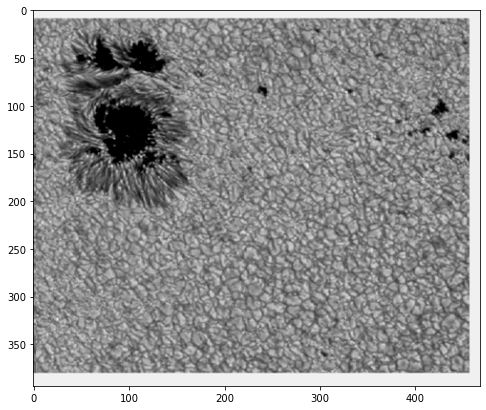

In [47]:
import cv2
import matplotlib.pyplot as plt  
import numpy
imgC = cv2.imread('yuantu')
print(type(imgC))
print(imgC.shape)
imgD = imgC[:,:468,:]
imgF = imgC[:,468:936,:]
plt.figure(figsize=(8,10))
#plt.subplot(1,3,1)
#plt.imshow(imgD)
#plt.savefig('/Users/huangjiawei/opencv-tutorial/black/heizi1.jpg')
#plt.subplot(1,3,2)

plt.imshow(imgF)
plt.savefig('/Users/huangjiawei/opencv-tutorial/black/heizi2.jpg')
#plt.subplot(1,3,3)
#plt.imshow(imgC)

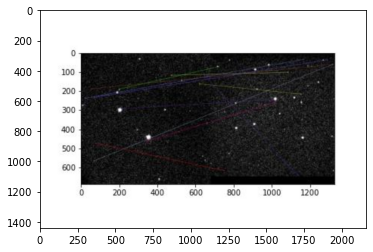

In [18]:
import numpy as np
import cv2 
%matplotlib inline
import matplotlib.pyplot as plt
img1 = cv2.imread('/Users/huangjiawei/opencv-tutorial/black/black3.jpg', cv2.IMREAD_COLOR)
#print(len(img[0,:]))
height,width,channel = img1.shape
figsize=(20,10)
size_increase = (int(width*5),int(height*5))
dst2 = cv2.resize(img1,size_increase,interpolation=cv2.INTER_LINEAR)
#ax0.imshow(cv2.cvtColor(dst1, cv2.COLOR_BGR2RGB))
plt.imshow(cv2.cvtColor(dst2, cv2.COLOR_BGR2RGB))

In [3]:
pip install imageio

Note: you may need to restart the kernel to use updated packages.


In [48]:
import imageio
from pathlib import Path


def imgs2gif(imgPaths, saveName, duration=None, loop=0, fps=None):
    """
    生成动态图片 格式为 gif
    :param imgPaths: 一系列图片路径
    :param saveName: 保存gif的名字
    :param duration: gif每帧间隔， 单位 秒
    :param fps: 帧率
    :param loop: 播放次数（在不同的播放器上有所区别）， 0代表循环播放
    :return:
    """
    if fps:
        duration = 1 / fps
    images = [imageio.imread(str(img_path)) for img_path in imgPaths]
    imageio.mimsave(saveName, images, "gif", duration=duration, loop=loop)


pathlist = Path(r"/Users/huangjiawei/opencv-tutorial/black").glob("*.jpg")

p_lis = []
for n, p in enumerate(pathlist):
    if n % 1 == 0:
        p_lis.append(p)

imgs2gif(p_lis, "black.gif", 1 * 3, 0)
#imgs2gif(p_lis, "black2.gif", 0.1 * 3, 1)
